In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/london-crime/london_crime_by_lsoa.csv


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import folium

print('Libraries are already imported!')

Libraries are already imported!


In [3]:
df=pd.read_csv('../input/london-crime/london_crime_by_lsoa.csv')

In [4]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [5]:
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [10]:
df.shape

(13490604, 7)

In [11]:
df.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [12]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [13]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [14]:
df.duplicated()

0           False
1           False
2           False
3           False
4           False
            ...  
13490599    False
13490600    False
13490601    False
13490602    False
13490603    False
Length: 13490604, dtype: bool

In [15]:
print('borough: ', df['borough'].unique())
print('major_category: ', df['major_category'].unique())
print('minor_category: ', df['minor_category'].unique())

borough:  ['Croydon' 'Greenwich' 'Bromley' 'Redbridge' 'Wandsworth' 'Ealing'
 'Hounslow' 'Newham' 'Sutton' 'Haringey' 'Lambeth' 'Richmond upon Thames'
 'Hillingdon' 'Havering' 'Barking and Dagenham' 'Kingston upon Thames'
 'Westminster' 'Hackney' 'Enfield' 'Harrow' 'Lewisham' 'Brent' 'Southwark'
 'Barnet' 'Waltham Forest' 'Camden' 'Bexley' 'Kensington and Chelsea'
 'Islington' 'Tower Hamlets' 'Hammersmith and Fulham' 'Merton'
 'City of London']
major_category:  ['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage' 'Drugs' 'Fraud or Forgery' 'Other Notifiable Offences'
 'Sexual Offences']
minor_category:  ['Burglary in Other Buildings' 'Other violence' 'Personal Property'
 'Other Theft' 'Offensive Weapon' 'Criminal Damage To Other Building'
 'Theft/Taking of Pedal Cycle' 'Motor Vehicle Interference & Tampering'
 'Theft/Taking Of Motor Vehicle' 'Wounding/GBH' 'Other Theft Person'
 'Common Assault' 'Theft From Shops' 'Possession Of Drugs' 'Harassment'

In [16]:
print('value: ', df['value'].unique())
print('year: ', df['year'].unique())
print('month: ', df['month'].unique())

value:  [  0   1   2   3   4   9   5   6   7  10  18  11  16   8  72  12  53  14
  19  15  17  20  43  50  37  57  21  13  80  25  28  22  58  33  29  38
  88  23 111  40  39  60  26  48  32  66 122  47  30 118  75  54  51  67
  45  35  24 117  27  68  99  65  84  34  55  81 112 119  71 113  36  61
  46  31  59  44 149  49 241 104  69  77  41  64  42 167  73  74 165 107
  86  52  63  79 103 106  70  90  91 148 130  62 136  98  92 141  78  82
  56 194 168 152 204 114 153 116 157 131 120  96 101  97  95 309 142  87
 146 195  93 166 144  94 161 135 170  76 127 210  83 150 186 156 124  85
 174 221 163 109 110  89 115 138 140 121 139 105 129 177 237 235 226 199
 240 189 280 100 102 288 134 244 211 158 187 137 123 164 108 224 201 233
 132 220 126 154 133 257 178 214 147 229 176 202 230 155 162 160 203 248
 215 172 192 208 232 197 173 216 205 180 151 184 179 243 188 228 159 254
 267 247 196 181 193 260 169 281 212 183 128 217 143 239 200 249 125 253
 145 185 190 286 258 182 175 198 262 251 23

In [17]:
df_major_category= df.groupby('major_category', axis=0).sum()
df_major_category

,value,year,month
major_category,,,
Burglary,754293,2099731248,6783426
Criminal Damage,630938,4163174064,13449618
Drugs,470765,2373089616,7666542
Fraud or Forgery,5325,475878240,1537380
Other Notifiable Offences,106349,1561923648,5045976
Robbery,258873,1890040608,6105996
Sexual Offences,1273,217513296,702702
Theft and Handling,2661861,7980195600,25780950
Violence Against the Person,1558081,6381548928,20616336


In [26]:
major_crimes= df.major_category.value_counts()
major_crimes

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64

**<h1> VISUALISASI DATA**

**<h2> Histogram**

In [40]:
hist = df[df['year'] <= 2013]
hist

,lsoa_code,borough,major_category,minor_category,value,year,month
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
...,...,...,...,...,...,...,...
13490595,E01001144,Croydon,Violence Against the Person,Harassment,0,2012,1
13490596,E01000655,Bromley,Theft and Handling,Theft From Shops,0,2010,7
13490598,E01032577,Hillingdon,Theft and Handling,Other Theft,0,2012,2
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2


In [41]:
hist = hist.pivot_table(index='borough', columns='year', values='value', aggfunc='sum')
hist['Total'] = hist.sum(axis=1)
hist.sort_values(['Total'], ascending=False, axis=0, inplace=True)
hist_3 = hist.drop('Total', axis=1, inplace=True)
hist_3 = hist.head(n=3).transpose()
hist_3

borough,Westminster,Lambeth,Camden
year,,,
2008,47846,31717,32010
2009,48456,31225,31612
2010,48116,31671,31804
2011,54243,33224,33956
2012,59226,33473,31472
2013,53852,31868,28435


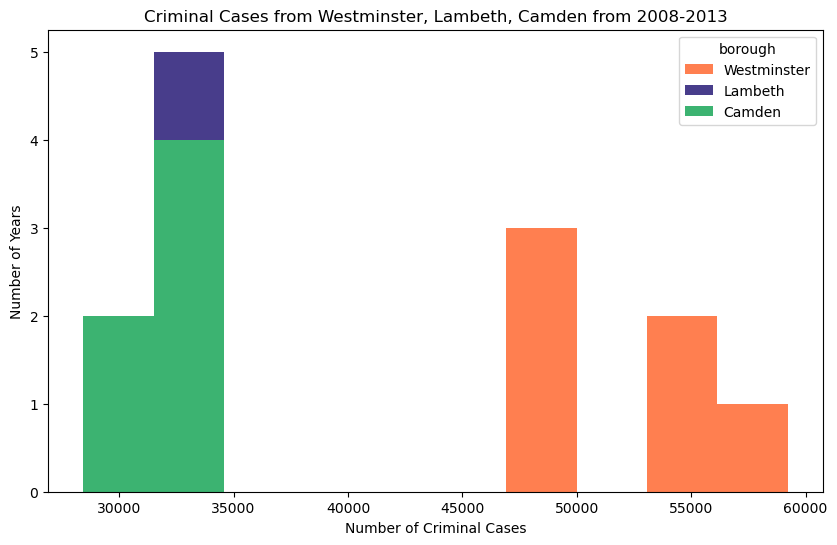

In [44]:
hist_3.plot(kind='hist', figsize=(10, 6), color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.title('Criminal Cases from Westminster, Lambeth, Camden from 2008-2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Criminal Cases')

plt.show()

**<h2> Bar Chart**

Text(0, 0.5, 'Total Kasus')

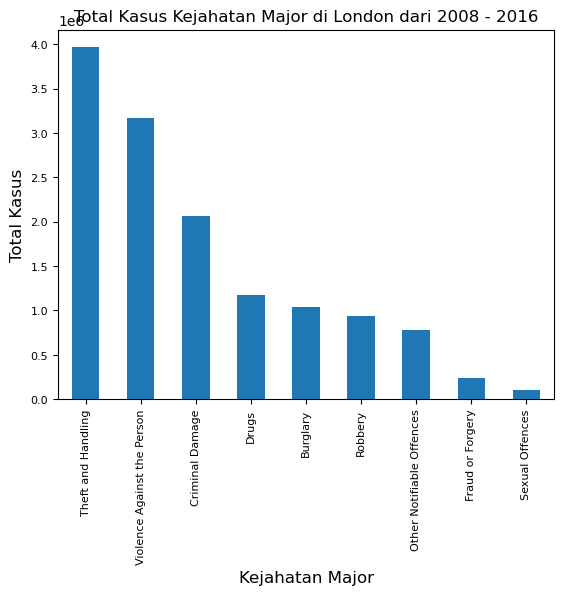

In [73]:
major_crimes.plot.bar(title = "Total Kasus Kejahatan Major di London dari 2008 - 2016", fontsize=8)
plt.xlabel('Kejahatan Major', fontsize=12)
plt.ylabel('Total Kasus', fontsize=12)

Dari grafik diatas terlihat bahwa kejahatan major tertinggi adalah ***Theft and Handling*** lalu disusul oleh kejahatan ***Violence Against the Person***

**<h2>Pie Chart**

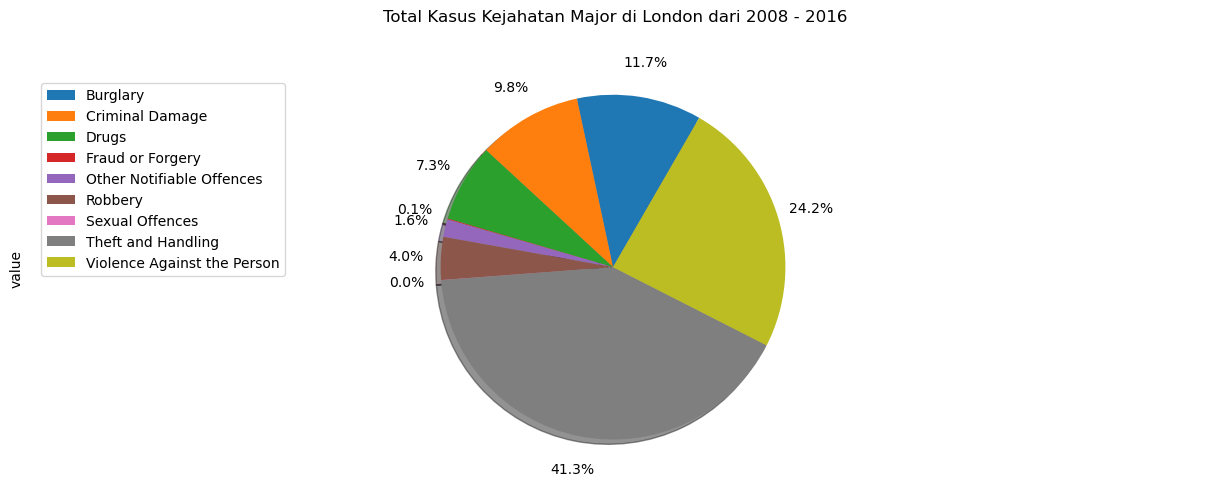

In [35]:
df_major_category['value'].plot(kind='pie',
            figsize=(15,5),
            autopct='%1.1f%%',
            startangle=60,
            shadow=True,
            labels=None,         
            pctdistance=1.2
            )
plt.title("Total Kasus Kejahatan Major di London dari 2008 - 2016", y=1.12)
plt.axis('equal')
plt.legend(labels=df_major_category.index, loc='upper left')
plt.show()

Dari pie chart diatas terlihat bahwa kejahatan major di kota London dari tahun 2008 - 2016 tertinggi adalah ***Theft and Handling*** dengan persentase 41.3%

In [45]:
bplot = df.pivot_table(index='borough', columns='year', values='value', aggfunc=sum)
bplot.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164


**<h2>Boxplot**

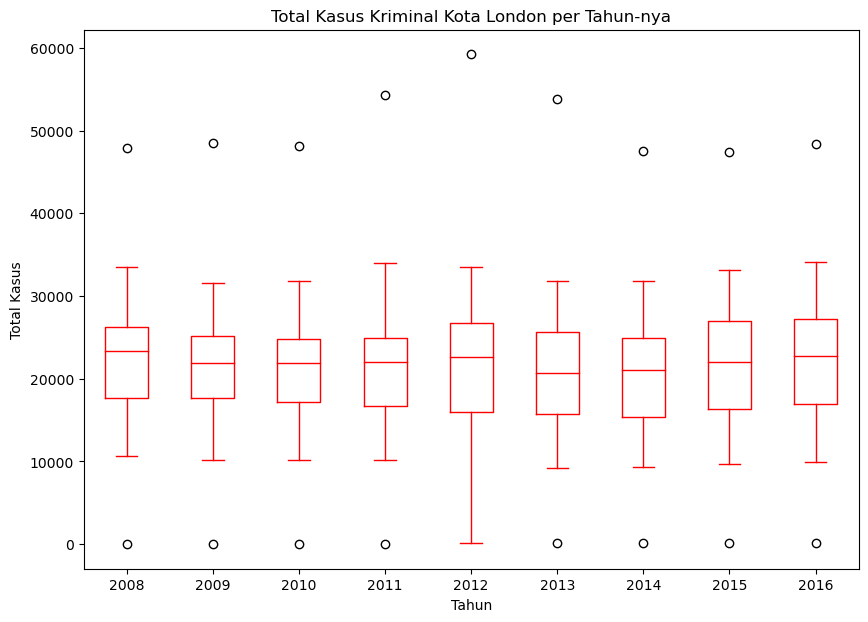

In [50]:
bplot.plot(kind='box', figsize=(10, 7), color='red', vert=True)

plt.title('Total Kasus Kriminal Kota London per Tahun-nya')
plt.xlabel('Tahun')
plt.ylabel('Total Kasus')

plt.show()

Range untuk total kasus kejahatan yang terjadi per tahun-nya memiliki range yang tidak jauh berbeda, kecuali untuk tahun 2012. Range total kasus kejahatan pada tahun 2012 terlihat lebih tersebar jika dibandingkan dengan tahun-tahun lainnya pada gambar diatas.

**<h2>Scatter Plot**

In [52]:
splot = df.pivot_table(index='year', columns='borough', values='value', aggfunc=sum)
splot['Total'] = splot.sum(axis=1)
splot2 = splot[['Total']]
splot2.reset_index(inplace=True)
splot2

borough,year,Total
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


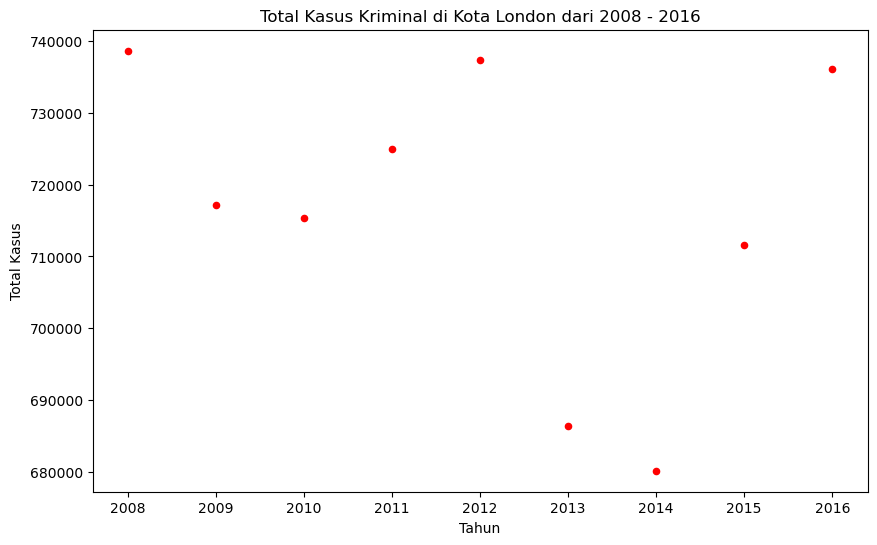

In [56]:
splot2.plot(kind='scatter', x='year', y='Total', figsize=(10, 6), color='red')

plt.title('Total Kasus Kriminal di Kota London dari 2008 - 2016')
plt.xlabel('Tahun')
plt.ylabel('Total Kasus')

plt.show()

Dari scatter plot diatas terlihat bahwa total kasus kejahatan yang terjadi di London pada tahun 2008 - 2016 tidak mengalami penurunan secara stabil. Terlihat pada tahun 2014 total kasus kejahatan yang terjadi telah mengalami penurunan, akan tetapi pada tahun berikutnya total kasus kejahatan mengalami kenaikan kembali hingga tahun 2016.

**<h2>Word Clouds**

In [85]:
wordclouds = df['major_category']
wordclouds

0                              Burglary
1           Violence Against the Person
2           Violence Against the Person
3                              Burglary
4                               Robbery
                       ...             
13490599                Criminal Damage
13490600                        Robbery
13490601                       Burglary
13490602                        Robbery
13490603    Violence Against the Person
Name: major_category, Length: 13490604, dtype: object

In [86]:
wordclouds = wordclouds.to_csv("mjr_cat.txt", header=None, index=None, sep=' ', mode='a')

In [91]:
major = open('mjr_cat.txt','r').read()

In [92]:
stopwords = set(STOPWORDS)
major_wc = WordCloud(
        background_color='white',
        stopwords=stopwords)
major_wc.generate(major)

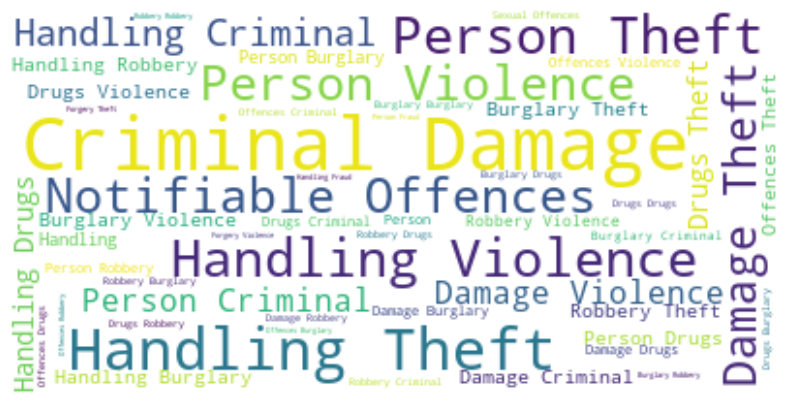

In [96]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(16)

plt.imshow(major_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Dari word clouds diatas terlihat bahwa *Criminal, Damage, Handling,* dan juga *Theft* memiliki ukuran huruf yang besar, dengan begitu kata-kata tersebut adalah kata-kata yang sering muncul didalam kasus kejahatan *major category*

**<h1>Overall Analysis**

Berdasarkan visualisasi data yang telah dilakukan dengan menggunakan dataset kasus kriminal di London tahun 2008-2016 diperoleh informasi bahwa terdapat berbagai macam kasus kriminal dengan berbagai kategori yang terjadi di kota London. Kasus yang paling sering adalah Pencurian dan Westminster merupakan wilayah dengan kasus terbanyak. 